## EXPLORATORY DATA ANALYSIS FOR NVDA STOCK

In [21]:
import pandas as pd
import html
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import datetime as dt
from wordcloud import WordCloud

In [22]:
df = pd.read_csv(r'C:\Users\sowmy\Desktop\Technocolabs\Datasets\TwitterData\MSFT.csv')
df

,Datetime,Text
0,2020-05-31 23:06:34+00:00,MSFT Long our Short - #MSFT chart https://t.c...
1,2020-05-31 20:15:47+00:00,ForexAnalytix Interview: The Case For Value Ov...
2,2020-05-31 19:32:52+00:00,Group 3 Stocks &amp; ETF charts are updated in...
3,2020-05-31 19:27:36+00:00,"_\n\nDon Mattrick ""left"" #MSFT for telling the..."
4,2020-05-31 19:26:06+00:00,"As the lockdown hasn't ended, protests are eru..."
...,...,...
17321,2021-01-01 05:05:52+00:00,"If you #trade #stocks like #FB, #AAPL, #AMZN, ..."
17322,2021-01-01 02:20:30+00:00,Financials of #Microsoft #MSFT $MSFT https://t...
17323,2021-01-01 01:22:50+00:00,Did you know that there is a Windows feature t...
17324,2021-01-01 01:17:19+00:00,We are freaking out about this because… among ...


In [23]:
MSFT_clean = df.drop_duplicates('Text',keep='first') #delete the duplicates by dropping them and store the result value to a new variable
MSFT_clean.Text = MSFT_clean.Text.str.lower() #convert text to lower case
MSFT_clean.Text = MSFT_clean.Text.apply(lambda x: re.split('https:\/\/.*', str(x))[0])  #remove urls
MSFT_clean.Text = MSFT_clean.Text.apply(lambda x: re.sub(r'@\w+', '', str(x)))   #remove mentions
MSFT_clean.Text = MSFT_clean.Text.apply(lambda x: re.sub(r'&[a-z]+;', '', str(x))) #remove html characters
MSFT_clean.Text = MSFT_clean.Text.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
def getSubjectivity(MSFT_clean):
    return TextBlob(MSFT_clean).sentiment.subjectivity

def getPolarity(MSFT_clean):
    return TextBlob(MSFT_clean).sentiment.polarity


def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"    

MSFT_clean['Subjectivity'] = MSFT_clean['Text'].apply(getSubjectivity)
MSFT_clean['Polarity'] = MSFT_clean['Text'].apply(getPolarity)
MSFT_clean["Score"] = MSFT_clean['Polarity'].apply(getTextAnalysis)
MSFT_clean.Score

<ipython-input-24-8467acb599bb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT_clean['Subjectivity'] = MSFT_clean['Text'].apply(getSubjectivity)
<ipython-input-24-8467acb599bb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT_clean['Polarity'] = MSFT_clean['Text'].apply(getPolarity)
<ipython-input-24-8467acb599bb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

0        Negative
1         Neutral
2         Neutral
3         Neutral
4        Positive
           ...   
17320    Negative
17321    Positive
17323    Positive
17324    Negative
17325     Neutral
Name: Score, Length: 16636, dtype: object

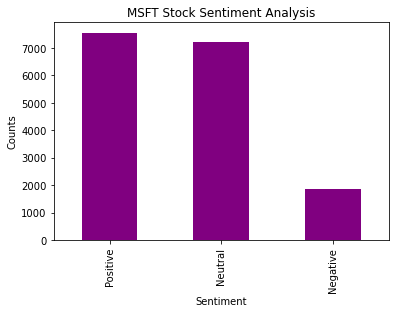

In [7]:
MSFT_clean['Score'].value_counts()

plt.title('MSFT Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
MSFT_clean['Score'].value_counts().plot(kind = 'bar', color='purple')
plt.show()

<ipython-input-8-ef9ac4a0fc48>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  MSFT_clean.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],


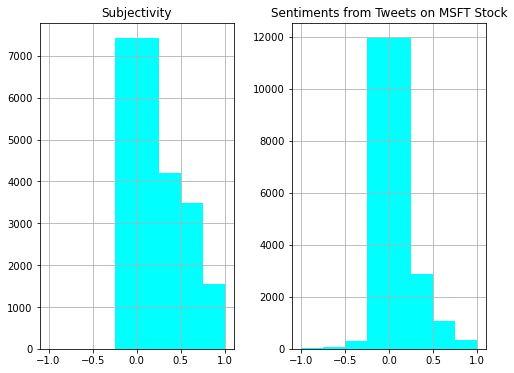

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
MSFT_clean.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="cyan")

plt.title("Sentiments from Tweets on MSFT Stock")
plt.show()

In [25]:
segment = pd.get_dummies(MSFT_clean['Score'])
segment

,Negative,Neutral,Positive
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
17320,1,0,0
17321,0,0,1
17323,0,0,1
17324,1,0,0


In [26]:

segment['Negative']= segment['Negative'].apply(lambda x: float(x))
segment['Positive']=segment['Positive'].apply(lambda x: float(x))
segment['Neutral']=segment['Neutral'].apply(lambda x: float(x))


In [27]:
joined_df = pd.concat([MSFT_clean, segment], axis = 1)
joined_df['Datetime'] = pd.to_datetime(joined_df.Datetime, errors='coerce',format='%Y/%m/%d %H:%M:%S.%f')


In [28]:
datetime_list = joined_df["Datetime"].tolist()
df1 = joined_df.groupby([joined_df['Datetime'].dt.date]).sum()
df1

,Subjectivity,Polarity,Negative,Neutral,Positive
Datetime,,,,,
2020-01-01,4.163598,3.210038,0.0,13.0,7.0
2020-01-02,4.431061,1.149621,1.0,6.0,8.0
2020-01-03,5.854726,3.100902,2.0,2.0,11.0
2020-01-04,1.678662,0.887626,1.0,1.0,3.0
2020-01-05,0.986667,0.292500,1.0,2.0,2.0
...,...,...,...,...,...
2021-09-16,5.584558,1.602437,2.0,16.0,11.0
2021-09-17,5.107096,2.258712,3.0,5.0,6.0
2021-09-18,1.294886,0.659091,0.0,5.0,3.0


In [29]:
df2 = df1
df2.reset_index(inplace=True)
df2

,Datetime,Subjectivity,Polarity,Negative,Neutral,Positive
0,2020-01-01,4.163598,3.210038,0.0,13.0,7.0
1,2020-01-02,4.431061,1.149621,1.0,6.0,8.0
2,2020-01-03,5.854726,3.100902,2.0,2.0,11.0
3,2020-01-04,1.678662,0.887626,1.0,1.0,3.0
4,2020-01-05,0.986667,0.292500,1.0,2.0,2.0
...,...,...,...,...,...,...
623,2021-09-16,5.584558,1.602437,2.0,16.0,11.0
624,2021-09-17,5.107096,2.258712,3.0,5.0,6.0
625,2021-09-18,1.294886,0.659091,0.0,5.0,3.0
626,2021-09-19,0.287143,0.337143,0.0,7.0,2.0


In [30]:
col_list = list(df2)
col_list.remove('Datetime')
df2['Total_Tweets'] = df2[col_list].sum(axis=1)

In [31]:
df2['Datetime']=pd.to_datetime(df2.Datetime, format='%Y/%m/%d %H:%M:%S.%f')
df2['Year'] = df2['Datetime'].dt.year
df2['Month'] = df2['Datetime'].dt.month
df2['Day'] = df2['Datetime'].dt.day
df2

,Datetime,Subjectivity,Polarity,Negative,Neutral,Positive,Total_Tweets,Year,Month,Day
0,2020-01-01,4.163598,3.210038,0.0,13.0,7.0,27.373636,2020,1,1
1,2020-01-02,4.431061,1.149621,1.0,6.0,8.0,20.580682,2020,1,2
2,2020-01-03,5.854726,3.100902,2.0,2.0,11.0,23.955628,2020,1,3
3,2020-01-04,1.678662,0.887626,1.0,1.0,3.0,7.566288,2020,1,4
4,2020-01-05,0.986667,0.292500,1.0,2.0,2.0,6.279167,2020,1,5
...,...,...,...,...,...,...,...,...,...,...
623,2021-09-16,5.584558,1.602437,2.0,16.0,11.0,36.186995,2021,9,16
624,2021-09-17,5.107096,2.258712,3.0,5.0,6.0,21.365808,2021,9,17
625,2021-09-18,1.294886,0.659091,0.0,5.0,3.0,9.953977,2021,9,18
626,2021-09-19,0.287143,0.337143,0.0,7.0,2.0,9.624286,2021,9,19


In [13]:
df2.to_csv('EDA_MSFT.csv', index=False)

In [32]:
df3 = pd.read_csv('C:/Users/sowmy/Desktop/Technocolabs/Datasets/FinancialData/MSFT.csv')

In [33]:
df3

,Date,Close/Last,Volume,Open,High,Low
0,09/21/2021,$294.8,22364100.0,$295.69,$297.54,$294.07
1,09/20/2021,$294.3,38278660.0,$296.33,$298.72,$289.52
2,09/17/2021,$299.87,41372460.0,$304.17,$304.5,$299.53
3,09/16/2021,$305.22,19550820.0,$303.76,$305.31,$300.76
4,09/15/2021,$304.82,28356300.0,$303.26,$305.32,$301.82
...,...,...,...,...,...,...
1246,NaN,NaN,NaN,NaN,NaN,NaN
1247,NaN,NaN,NaN,NaN,NaN,NaN
1248,NaN,NaN,NaN,NaN,NaN,NaN
1249,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df3['Date'] = pd.to_datetime(df3['Date']).apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
df2.rename(columns = {'Datetime':'Date'}, inplace = True)
df2.Date

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
623   2021-09-16
624   2021-09-17
625   2021-09-18
626   2021-09-19
627   2021-09-20
Name: Date, Length: 628, dtype: datetime64[ns]

In [35]:
df3['Date'] = pd.to_datetime(df3.Date, errors='coerce',format='%Y/%m/%d')
df3.rename(columns = {'Close/Last':'Close'}, inplace = True)

In [36]:
# Merge the two dataframes, using _ID column as key
merge_left = pd.merge(df2, df3, on = 'Date', how='left')
merge_left.set_index('Date', inplace = True)
# Write it to a new CSV file
#df3.to_csv('CSV3.csv')

In [37]:
merge_left.reset_index(inplace=True)
merge_left

,Date,Subjectivity,Polarity,Negative,Neutral,Positive,Total_Tweets,Year,Month,Day,Close,Volume,Open,High,Low
0,2020-01-01,4.163598,3.210038,0.0,13.0,7.0,27.373636,2020,1,1,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,4.431061,1.149621,1.0,6.0,8.0,20.580682,2020,1,2,$160.62,22634550.0,$158.78,$160.73,$158.33
2,2020-01-03,5.854726,3.100902,2.0,2.0,11.0,23.955628,2020,1,3,$158.62,21121680.0,$158.32,$159.945,$158.06
3,2020-01-04,1.678662,0.887626,1.0,1.0,3.0,7.566288,2020,1,4,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,0.986667,0.292500,1.0,2.0,2.0,6.279167,2020,1,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,2021-09-16,5.584558,1.602437,2.0,16.0,11.0,36.186995,2021,9,16,$305.22,19550820.0,$303.76,$305.31,$300.76
624,2021-09-17,5.107096,2.258712,3.0,5.0,6.0,21.365808,2021,9,17,$299.87,41372460.0,$304.17,$304.5,$299.53
625,2021-09-18,1.294886,0.659091,0.0,5.0,3.0,9.953977,2021,9,18,NaN,NaN,NaN,NaN,NaN
626,2021-09-19,0.287143,0.337143,0.0,7.0,2.0,9.624286,2021,9,19,NaN,NaN,NaN,NaN,NaN


In [38]:
merge_left['Close'] = merge_left['Close'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['Open'] = merge_left['Open'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['Low'] = merge_left['Low'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['High'] = merge_left['High'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['dayOfWeek'] = merge_left['Date'].dt.day_name()

In [39]:
merge_2 = merge_left.sort_index(ascending=True)

#Add stock name column = NVDA 
merge_2['Stock name']= 'MSFT'
colum_names = ['Stock name','Date','Year','Month','Day','dayOfWeek','Close','Open','High','Low','Volume','Polarity','Subjectivity','Positive','Negative','Neutral','Total_Tweets']
merge_3 = merge_2.reindex(columns=colum_names)
merge_3['Close'] = merge_3['Close'].astype(float)
merge_3['Open'] = merge_3['Open'].astype(float)
merge_3['High'] = merge_3['High'].astype(float)
merge_3['Low'] = merge_3['Low'].astype(float)
merge_4 = merge_3.interpolate(method = 'linear', limit_direction='backward')
merge_4

,Stock name,Date,Year,Month,Day,dayOfWeek,Close,Open,High,Low,Volume,Polarity,Subjectivity,Positive,Negative,Neutral,Total_Tweets
0,MSFT,2020-01-01,2020,1,1,Wednesday,160.620000,158.780000,160.730000,158.330000,2.263455e+07,3.210038,4.163598,7.0,0.0,13.0,27.373636
1,MSFT,2020-01-02,2020,1,2,Thursday,160.620000,158.780000,160.730000,158.330000,2.263455e+07,1.149621,4.431061,8.0,1.0,6.0,20.580682
2,MSFT,2020-01-03,2020,1,3,Friday,158.620000,158.320000,159.945000,158.060000,2.112168e+07,3.100902,5.854726,11.0,2.0,2.0,23.955628
3,MSFT,2020-01-04,2020,1,4,Saturday,158.756667,157.906667,159.663333,157.543333,2.102335e+07,0.887626,1.678662,3.0,1.0,1.0,7.566288
4,MSFT,2020-01-05,2020,1,5,Sunday,158.893333,157.493333,159.381667,157.026667,2.092503e+07,0.292500,0.986667,2.0,1.0,2.0,6.279167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,MSFT,2021-09-16,2021,9,16,Thursday,305.220000,303.760000,305.310000,300.760000,1.955082e+07,1.602437,5.584558,11.0,2.0,16.0,36.186995
624,MSFT,2021-09-17,2021,9,17,Friday,299.870000,304.170000,304.500000,299.530000,4.137246e+07,2.258712,5.107096,6.0,3.0,5.0,21.365808
625,MSFT,2021-09-18,2021,9,18,Saturday,298.013333,301.556667,302.573333,296.193333,4.034119e+07,0.659091,1.294886,3.0,0.0,5.0,9.953977
626,MSFT,2021-09-19,2021,9,19,Sunday,296.156667,298.943333,300.646667,292.856667,3.930993e+07,0.337143,0.287143,2.0,0.0,7.0,9.624286


In [41]:
merge_4.to_csv('MSFT_combined_POL.csv')

In [40]:
merge_4.dtypes

Stock name              object
Date            datetime64[ns]
Year                     int64
Month                    int64
Day                      int64
dayOfWeek               object
Close                  float64
Open                   float64
High                   float64
Low                    float64
Volume                 float64
Polarity               float64
Subjectivity           float64
Positive               float64
Negative               float64
Neutral                float64
Total_Tweets           float64
dtype: object

In [45]:
pwd

'C:\\Users\\sowmy\\Desktop\\Technocolabs\\Notebooks\\EDA_sentimentAnalysis'

In [46]:
df1 = pd.read_csv('NewFinal.csv')

In [48]:
df1.dtypes

Unnamed: 0      object
Stock name      object
Date            object
Year            object
Month           object
Day             object
dayOfWeek       object
Close           object
Open            object
High            object
Low             object
Volume          object
Subjectivity    object
Polarity        object
Positive        object
Negative        object
Neutral         object
Total_Tweets    object
dtype: object